In [22]:
import numpy as np

# Qiskit imports:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt





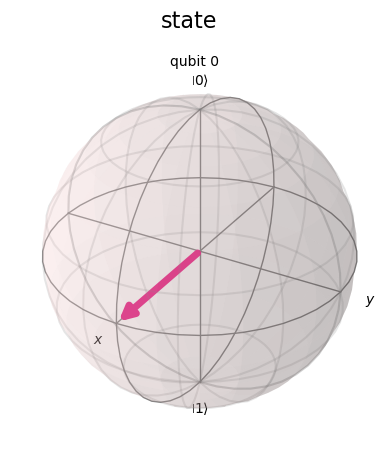

In [23]:
qc = QuantumCircuit(1) 
qc.h(0)

qc.save_statevector()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector, title='state')


In [3]:
#Question 1

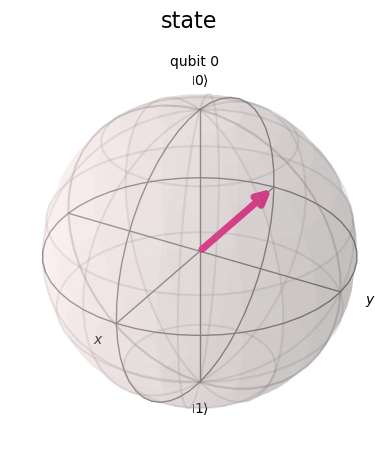

In [24]:
qc = QuantumCircuit(1) 
qc.x(0)
qc.h(0)

qc.save_statevector()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector, title='state')

In [5]:
#2-qubit QFT

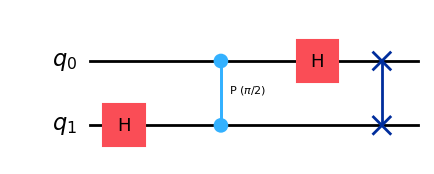

In [25]:
qc = QuantumCircuit(2) 
qc.h(1)
qc.cp(np.pi/2,1,0) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,1)
qc.draw('mpl')

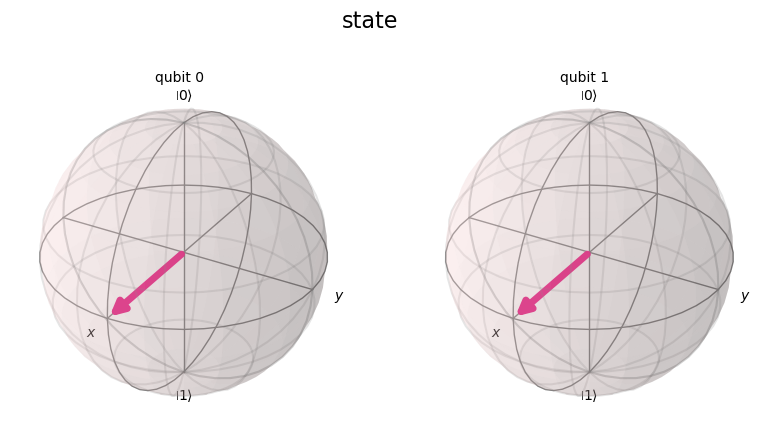

In [26]:
qc = QuantumCircuit(2,2) 
qc.h(1)
qc.cp(np.pi/2,0,1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,1)

qc.save_statevector()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator, optimization_level=0)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector, title='state')

In [8]:
#verification for question 2: 


Testing QFT of |0⟩ state
Circuit for QFT of |0⟩:


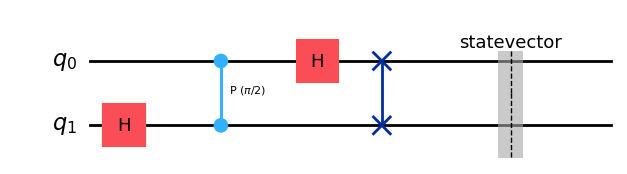

Bloch sphere representation of QFT |0⟩:

Testing QFT of |1⟩ state
Circuit for QFT of |1⟩:


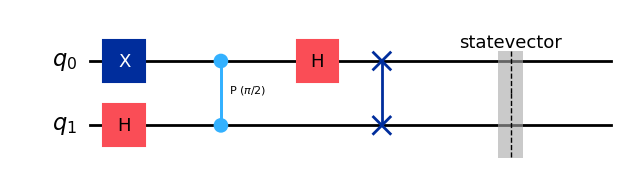

Bloch sphere representation of QFT |1⟩:

Testing QFT of |2⟩ state
Circuit for QFT of |2⟩:


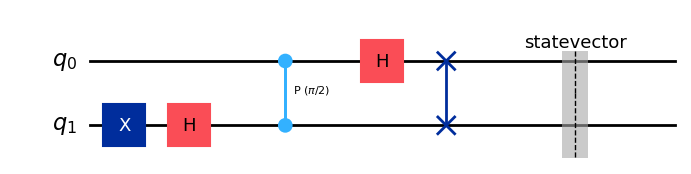

Bloch sphere representation of QFT |2⟩:

Testing QFT of |3⟩ state
Circuit for QFT of |3⟩:


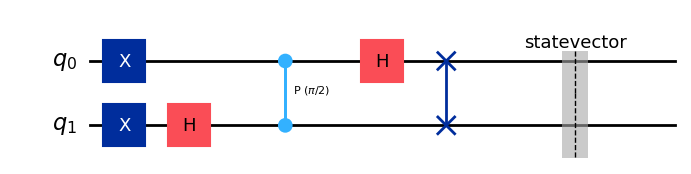

Bloch sphere representation of QFT |3⟩:


In [29]:
def test_2qubit_qft(input_state):
    qc = QuantumCircuit(2)
    
    # Prepare input state
    if input_state in [1, 3]:  # States with |1⟩ in qubit 0
        qc.x(0)
    if input_state in [2, 3]:  # States with |1⟩ in qubit 1
        qc.x(1)
    
    # Apply QFT
    qc.h(1)
    # Note: cp(theta, control_qubit, target_qubit)
    qc.cp(np.pi/2, 0, 1)  # CROT from qubit 0 to qubit 1
    qc.h(0)
    qc.swap(0, 1)
    
    qc.save_statevector()
    
    # Transpile for simulator
    simulator = AerSimulator()
    qc = transpile(qc, simulator, optimization_level=0)
    
    # Run and get statevector
    result = simulator.run(qc).result()
    statevector = result.get_statevector(qc)
    
    # Display the circuit and the Bloch sphere
    print(f"Circuit for QFT of |{input_state}⟩:")
    display(qc.draw('mpl'))
    
    print(f"Bloch sphere representation of QFT |{input_state}⟩:")
    fig = plot_bloch_multivector(statevector, title=f'QFT of |{input_state}⟩ state')
    plt.show()
    
    return statevector

# Test all four computational basis states
states = []
for j in range(4):
    print(f"\nTesting QFT of |{j}⟩ state")
    states.append(test_2qubit_qft(j))

In [31]:
#code to generate a circuit that does a n-qubit qFT:

In [32]:
def qft_rotations(circuit, n):
    #Performs qft on the first n qubits in circuit (without swaps
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [33]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [34]:
def qft(circuit, n):
    #QFT on the first n qubits in circuit
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

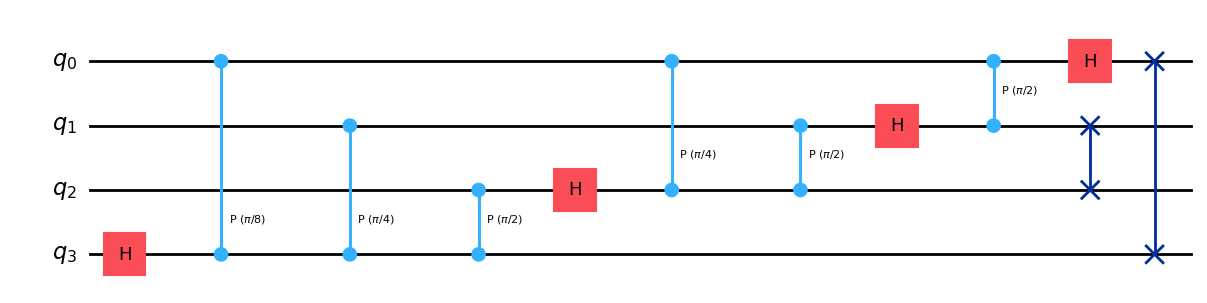

In [35]:
# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

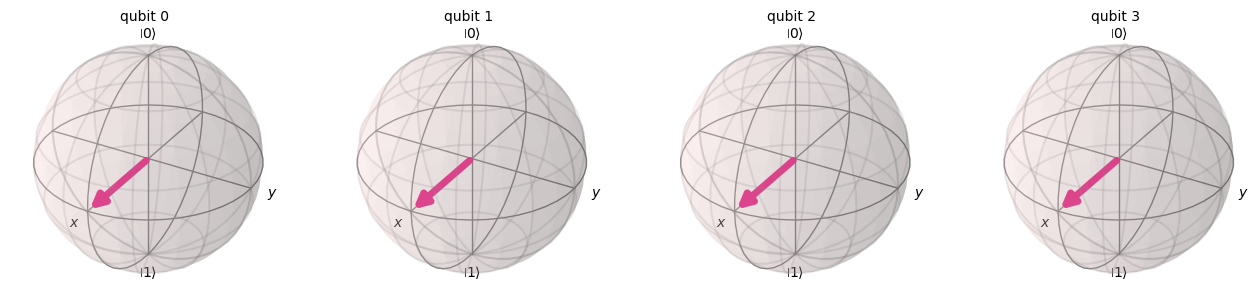

In [36]:
qc.save_statevector()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator, optimization_level=0)

# Run and get counts in a histogram
result = simulator.run(qc, shots=10000).result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector)

In [37]:
#Question-4, Testing different input states:

In [52]:
def test_nqubit_qft(n, input_state):
    print(f"\nTesting QFT on |{input_state}⟩ state:")
    
    qc = QuantumCircuit(n)
    
    # Convert input_state to binary and prepare the state
    binary = format(input_state, f'0{n}b')
    print(f"Binary representation: {binary}")
    for i in range(n):
        if binary[n-1-i] == '1':  # Using little-endian convention
            qc.x(i)
    
    # Apply QFT
    qft(qc, n)
    
    # Simulate and get statevector
    qc.save_statevector()
    simulator = AerSimulator()
    qc = transpile(qc, simulator, optimization_level=0)
    result = simulator.run(qc).result()
    statevector = result.get_statevector(qc)
    
    # Print the first few amplitudes
    print(f"State vector after QFT (showing non-zero amplitudes):")
    count = 0
    for i, amp in enumerate(statevector):
        if abs(amp) > 1e-10:  # Only print non-zero amplitudes
            print(f"|{i:0{n}b}⟩: {amp}")
            count += 1
            if count >= 8:  # Limit the output to first 8 non-zero amplitudes
                print("...")
                break
    
    # Print individual qubit states where possible
    print("\nIndividual qubit states:")
    for i in range(n):
        try:
            # Try to extract reduced density matrix for each qubit
            qubit_dm = qi.partial_trace(qi.DensityMatrix(statevector), [j for j in range(n) if j != i])
            # Get the bloch vector coordinates
            bloch = qi.Statevector(qubit_dm).expectation_value([qi.Pauli('X'), qi.Pauli('Y'), qi.Pauli('Z')])
            print(f"Qubit {i}: X={bloch[0]:.4f}, Y={bloch[1]:.4f}, Z={bloch[2]:.4f}")
        except:
            print(f"Qubit {i}: Could not compute Bloch vector")
    
    return statevector

# Run tests for question 4a
print("\n===== QUESTION 4a: Testing different input states =====")
n = 4
states = [0, 5, 10, 15]
for state in states:
    test_nqubit_qft(n, state)


===== QUESTION 4a: Testing different input states =====

Testing QFT on |0⟩ state:
Binary representation: 0000
State vector after QFT (showing non-zero amplitudes):
|0000⟩: (0.25000000000000006+0j)
|0001⟩: (0.25000000000000006+0j)
|0010⟩: (0.25000000000000006+0j)
|0011⟩: (0.25+0j)
|0100⟩: (0.25000000000000006+0j)
|0101⟩: (0.25+0j)
|0110⟩: (0.25+0j)
|0111⟩: (0.24999999999999994+0j)
...

Individual qubit states:
Qubit 0: Could not compute Bloch vector
Qubit 1: Could not compute Bloch vector
Qubit 2: Could not compute Bloch vector
Qubit 3: Could not compute Bloch vector

Testing QFT on |5⟩ state:
Binary representation: 0101


/var/folders/9l/tkw4b8992nbdhcwkkb19g5b40000gn/T/ipykernel_47295/1713205019.py:26: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):
/var/folders/9l/tkw4b8992nbdhcwkkb19g5b40000gn/T/ipykernel_47295/1713205019.py:26: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


State vector after QFT (showing non-zero amplitudes):
|0000⟩: (0.25-6.123233995736766e-17j)
|0001⟩: (-0.09567085809127235+0.23096988312782163j)
|0010⟩: (-0.17677669529663698-0.17677669529663684j)
|0011⟩: (0.23096988312782163-0.0956708580912725j)
|0100⟩: (7.654042494670957e-17+0.24999999999999994j)
|0101⟩: (-0.2309698831278216-0.0956708580912723j)
|0110⟩: (0.17677669529663678-0.17677669529663692j)
|0111⟩: (0.09567085809127253+0.2309698831278216j)
...

Individual qubit states:
Qubit 0: Could not compute Bloch vector
Qubit 1: Could not compute Bloch vector
Qubit 2: Could not compute Bloch vector
Qubit 3: Could not compute Bloch vector

Testing QFT on |10⟩ state:
Binary representation: 1010
State vector after QFT (showing non-zero amplitudes):
|0000⟩: (0.25-6.123233995736766e-17j)
|0001⟩: (-0.176776695296637-0.17677669529663684j)
|0010⟩: (7.654042494670955e-17+0.24999999999999994j)
|0011⟩: (0.1767766952966368-0.17677669529663698j)
|0100⟩: (-0.25000000000000006+6.123233995736767e-17j)
|0101

/var/folders/9l/tkw4b8992nbdhcwkkb19g5b40000gn/T/ipykernel_47295/1713205019.py:26: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):
/var/folders/9l/tkw4b8992nbdhcwkkb19g5b40000gn/T/ipykernel_47295/1713205019.py:26: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


In [53]:
# Question 4b: Count gates for general n-qubit QFT
def count_qft_gates(n):
    print("\n===== QUESTION 4b: Counting gates for n-qubit QFT =====")
    
    # i) Count Hadamard gates
    h_gates = n
    print(f"i) Number of Hadamard gates: {h_gates}")
    
    # ii) Count controlled phase gates for each qubit
    print(f"ii) Controlled phase gates for each qubit:")
    cp_gates_per_qubit = []
    for k in range(n):
        qubit_cps = n - 1 - k
        cp_gates_per_qubit.append(qubit_cps)
        print(f"   Qubit q_{k}: {qubit_cps} controlled phase gates")
    
    # iii) Total controlled phase gates
    total_cp_gates = sum(cp_gates_per_qubit)
    print(f"iii) Total controlled phase gates: {total_cp_gates}")
    print(f"     This equals n(n-1)/2 = {n}*({n}-1)/2 = {n*(n-1)//2}")
    
    # iv) Total gates (excluding swaps)
    total_gates = h_gates + total_cp_gates
    print(f"iv) Total gates (excluding swaps): {total_gates}")
    print(f"    = {h_gates} Hadamard gates + {total_cp_gates} controlled phase gates")
    print(f"    = n + n(n-1)/2 = n(n+1)/2 = {n}({n}+1)/2 = {n*(n+1)//2}")
    
    return h_gates, total_cp_gates, total_gates

# Run gate counting for n=4
count_qft_gates(4)


===== QUESTION 4b: Counting gates for n-qubit QFT =====
i) Number of Hadamard gates: 4
ii) Controlled phase gates for each qubit:
   Qubit q_0: 3 controlled phase gates
   Qubit q_1: 2 controlled phase gates
   Qubit q_2: 1 controlled phase gates
   Qubit q_3: 0 controlled phase gates
iii) Total controlled phase gates: 6
     This equals n(n-1)/2 = 4*(4-1)/2 = 6
iv) Total gates (excluding swaps): 10
    = 4 Hadamard gates + 6 controlled phase gates
    = n + n(n-1)/2 = n(n+1)/2 = 4(4+1)/2 = 10


(4, 6, 10)

In [54]:
# Question 4c: Compare QFT to classical FFT
def compare_qft_classical_fft():
    print("\n===== QUESTION 4c: Comparing QFT to classical FFT =====")
    
    print("i) Showing that an n-qubit QFT performs a N=2^n component Fourier Transform:")
    print("   - An n-qubit system has 2^n basis states |0⟩ to |2^n-1⟩")
    print("   - The QFT transforms between these 2^n basis states")
    print("   - Therefore, a QFT on n qubits performs a Fourier transform on N=2^n components")
    print("   - Inverting this: n = log₂(N)")
    
    print("\nii) Operations for QFT vs. classical FFT:")
    print("   - n-qubit QFT uses n(n+1)/2 gates")
    print("   - Substituting n = log₂(N), we get log₂(N)(log₂(N)+1)/2 = O(log²(N))")
    print("   - A classical FFT requires O(N log N) operations")
    print("   - For large N, O(log²(N)) is exponentially better than O(N log N)")
    print("   - However, this comparison assumes we already have the quantum state prepared")
    print("   - To prepare an arbitrary N-component vector as a quantum state requires O(N) operations")
    print("   - To extract all N amplitudes would also require O(N) measurements")
    print("   - The QFT advantage appears in algorithms like Shor's where we:")
    print("     1) Start with a simple quantum state (easy to prepare)")
    print("     2) Only need to extract specific information, not all amplitudes")
    print("   - In these specific applications, the QFT provides an exponential speedup")

# Run comparison
compare_qft_classical_fft()

# Create a verification example showing the QFT circuit for n=4
def show_qft_circuit(n=4):
    print(f"\n===== QFT Circuit for {n} qubits =====")
    qc = QuantumCircuit(n)
    qft(qc, n)
    print(qc)

# Show circuit
show_qft_circuit(4)


===== QUESTION 4c: Comparing QFT to classical FFT =====
i) Showing that an n-qubit QFT performs a N=2^n component Fourier Transform:
   - An n-qubit system has 2^n basis states |0⟩ to |2^n-1⟩
   - The QFT transforms between these 2^n basis states
   - Therefore, a QFT on n qubits performs a Fourier transform on N=2^n components
   - Inverting this: n = log₂(N)

ii) Operations for QFT vs. classical FFT:
   - n-qubit QFT uses n(n+1)/2 gates
   - Substituting n = log₂(N), we get log₂(N)(log₂(N)+1)/2 = O(log²(N))
   - A classical FFT requires O(N log N) operations
   - For large N, O(log²(N)) is exponentially better than O(N log N)
   - However, this comparison assumes we already have the quantum state prepared
   - To prepare an arbitrary N-component vector as a quantum state requires O(N) operations
   - To extract all N amplitudes would also require O(N) measurements
   - The QFT advantage appears in algorithms like Shor's where we:
     1) Start with a simple quantum state (easy to pr